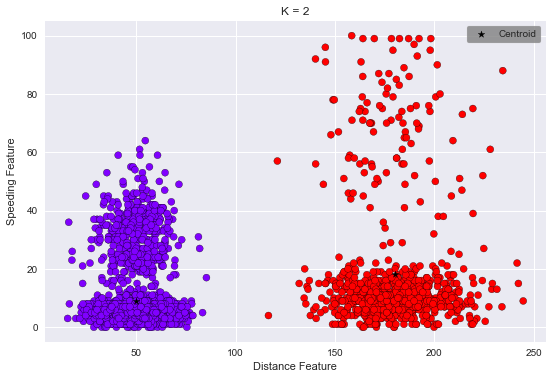

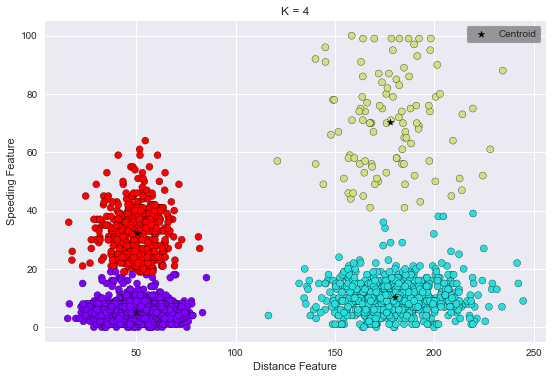

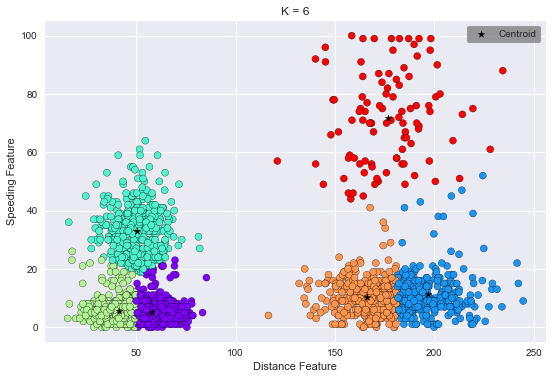

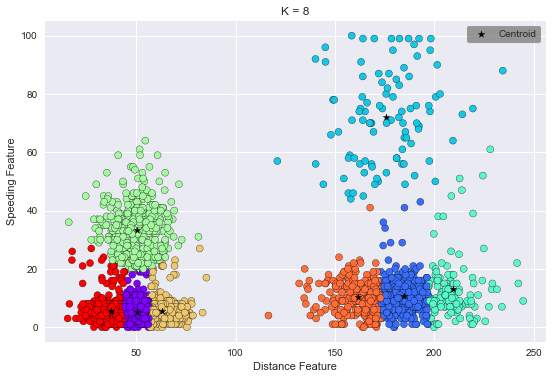

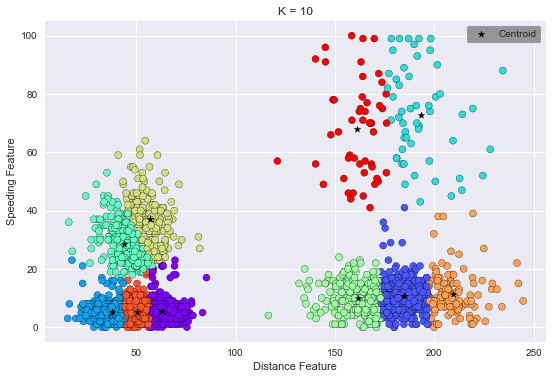

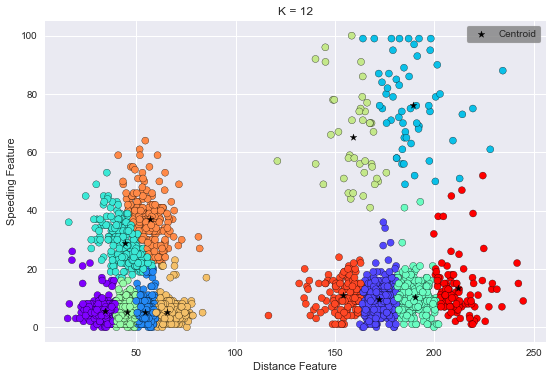

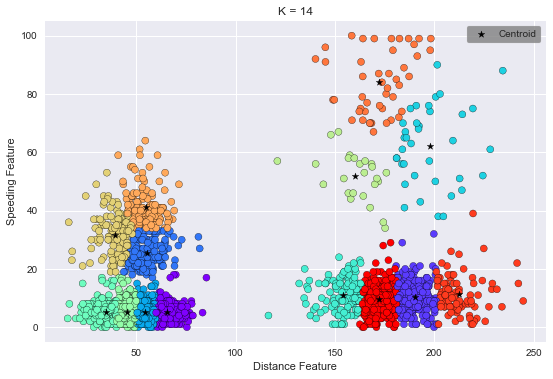

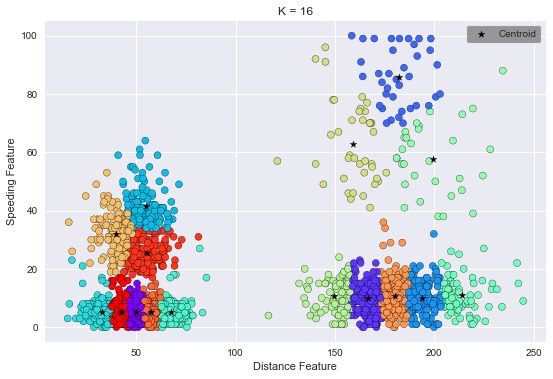

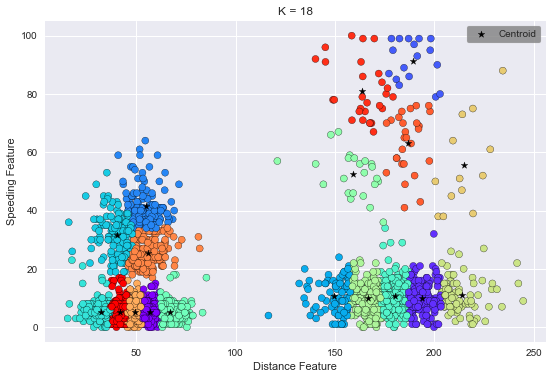

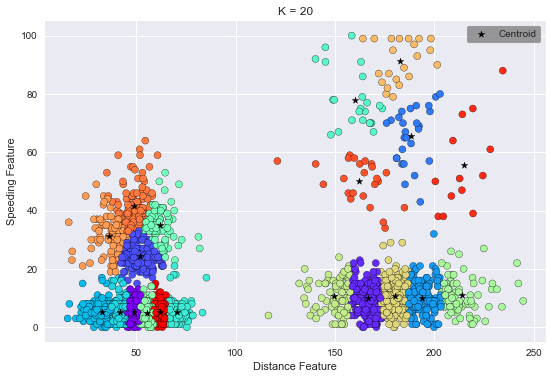

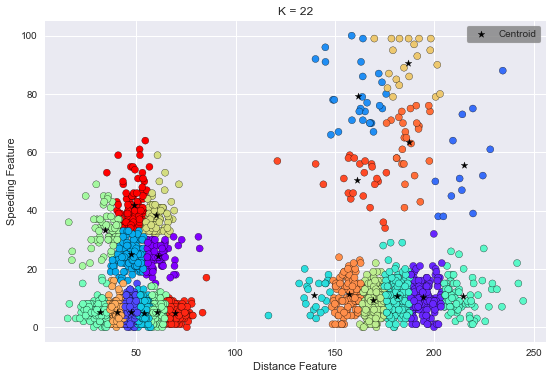

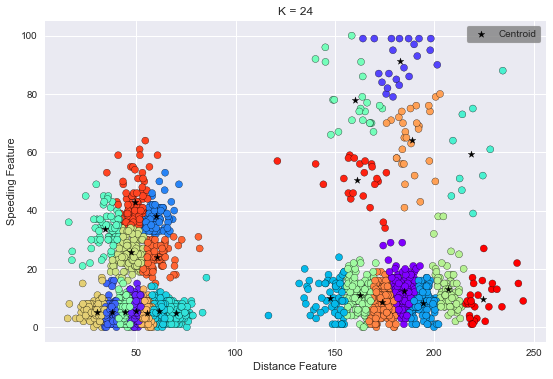

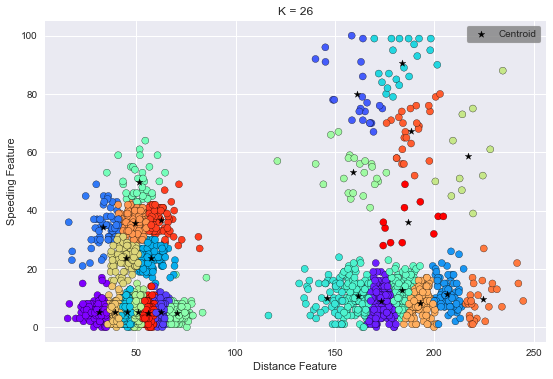

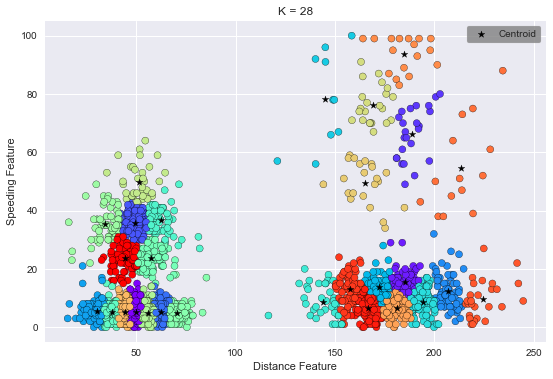

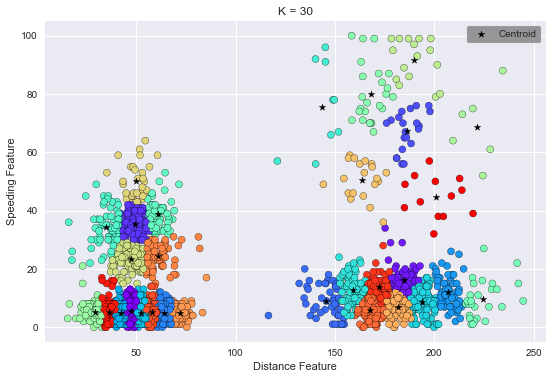

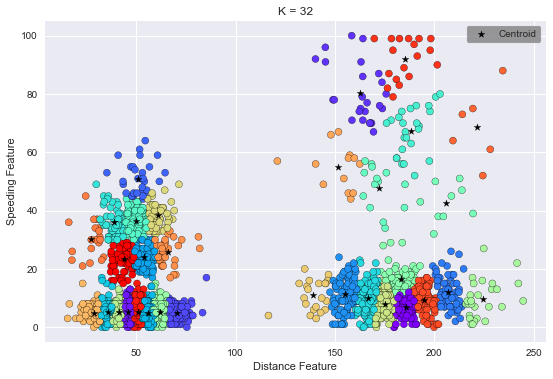

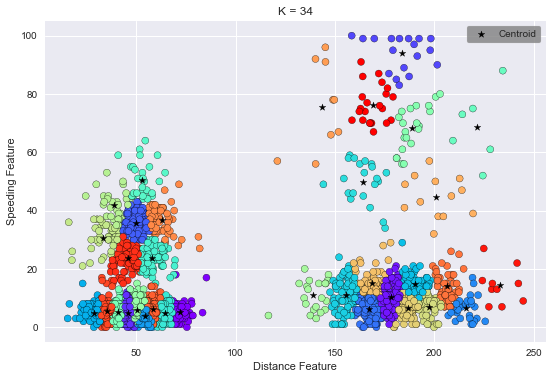

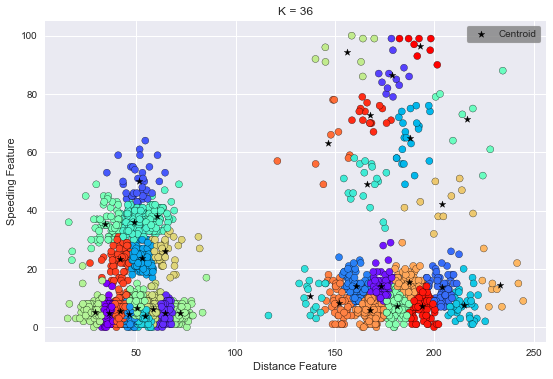

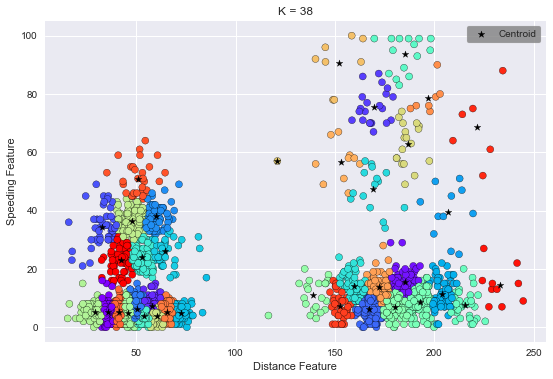

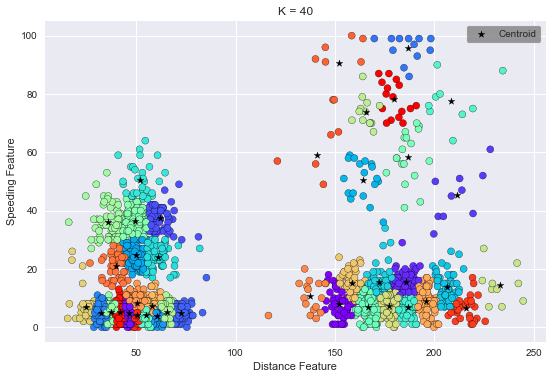

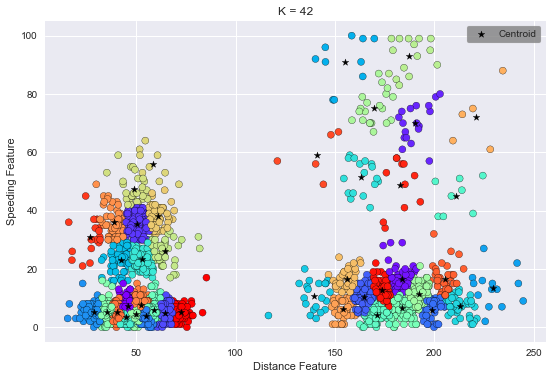

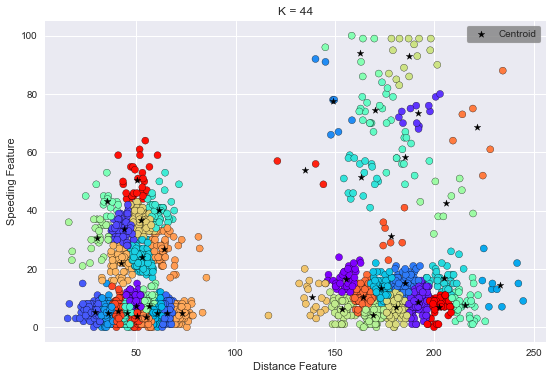

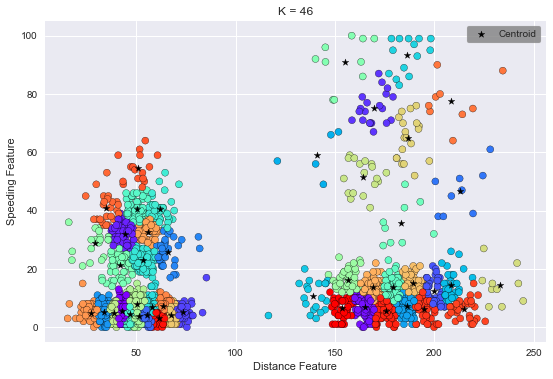

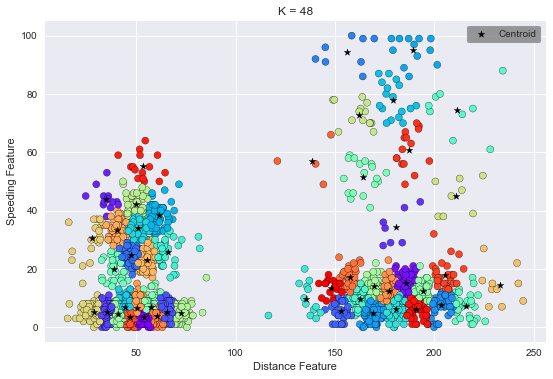

To observe the value of best K :
{2: 56193.95559252137, 4: 42658.39212104807, 6: 30309.913681499427, 8: 25245.79376226263, 10: 23760.78980737874, 12: 20944.42652431843, 14: 19843.96518813948, 16: 18120.61134841371, 18: 17744.929090741425, 20: 16700.96931109414, 22: 16162.943860108775, 24: 15281.260445040407, 26: 14904.541344301764, 28: 14417.49605260157, 30: 13881.345511832144, 32: 13717.463492673729, 34: 13199.536470761896, 36: 12929.154084989594, 38: 12652.065290208515, 40: 12102.81314218612, 42: 11977.483233754267, 44: 11769.495276994812, 46: 11429.909114337832, 48: 11412.077317508974}


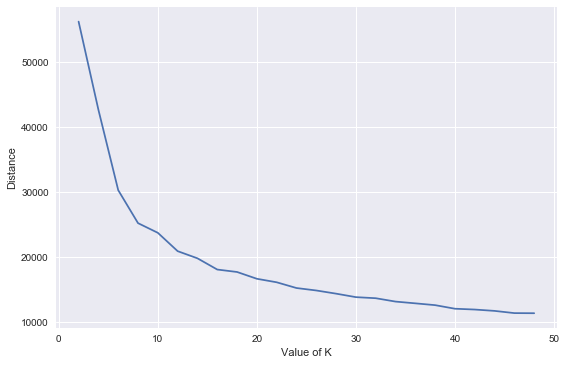

In [101]:
#Student Name : Sandeep Singh
#Student ID : C0727422

import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
from sklearn.cluster import KMeans
import urllib.request

distanceData = {}

def calcKMeans(k,X):
    kmeans = KMeans(n_clusters=k).fit(X)
    pp.scatter(X[:,0],X[:,1],c=kmeans.labels_,edgecolors='k',cmap='rainbow') 
    pp.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black', marker='*',label='Centroid')
    pp.title('K = {}'.format(k))
    pp.xlabel('Distance Feature')
    pp.ylabel('Speeding Feature')
    pp.style.use('seaborn')
    pp.legend(frameon=True,facecolor='grey')
    pp.show()
    return kmeans
    
def calcTotal(k,X,labels,centroids):
    i=0
    total=0
    for point in X:
        total= total+calcDistance(point,centroids[labels[i]])
        i=i+1
    distanceData[k]= total
    
def calcDistance(point,centroid):
    #print('Point ->', point,'Centroid ->',centroid,'\n')
    distance = np.sqrt(np.sum((point-centroid)**2))
    return distance


def main():
    urllib.request.urlretrieve('https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv','driversData.csv')
    
    df = pd.read_csv("driversData.csv",sep='\t')
    #print(df[:10])
    f1 = df['Distance_Feature'].values
    f2 = df['Speeding_Feature'].values
    
    X= np.array(list(zip(f1,f2)))
    #print(X)
    for k in range(2,50,2):
        kmeans = calcKMeans(k,X)
        calcTotal(k,X,kmeans.labels_,kmeans.cluster_centers_)
    
    print("To observe the value of best K :")
    print(distanceData)
    pp.plot(distanceData.keys(),distanceData.values())
    pp.xlabel("Value of K")
    pp.ylabel("Distance")
    pp.show()

    
main()